In [5]:
import numpy as np
import xarray as xr
import os
import cmocean.cm as cm
import cmocean.tools as cmt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

path = '../shared_materials/Data/'
file_list = ['ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-K003.hindcast_1m_19580101_20161231_diaptr.nc',
             'ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-K004.thermhal90_1m_19580101_20181231_diaptr.nc',
             'ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-K005.wind90_1m_19580101_20161231_diaptr.nc',
             'ORCA025.L46.LIM2vp.JRA.XIOS2-KPW001.RYF90_1m_19580101_20161231_diaptr.nc']


In [6]:
def load_n_slice_x(file, x_min = -60,x_max = -40 ):
    ds = xr.open_dataset(path + file)#dia
    ds = ds.set_coords(('nav_lat', 'nav_lon'))
    ds = ds.where((ds['nav_lon'] >= x_min) & (ds['nav_lon'] <= x_max))
    ds = ds.dropna(dim=('x'), how='all')
    ds = ds.sobarstf
    return ds


In [7]:
def slice_y(ds, y_min = 48, y_max = 64):
    ds = ds.where((ds['nav_lat'] >= y_min) & (ds['nav_lat'] <= y_max))
    ds = ds.dropna(dim=('y'), how='all')
    return ds


In [8]:
%%time
ds = load_n_slice_x(file_list[0])
ds = slice_y(ds)
ds.nbytes/1e9

AttributeError: 'Dataset' object has no attribute 'sobarstf'

In [5]:
lab_x = (-60, -40)#_boxmin, x_boxmax = -80, -65 #lon limits
lab_y = (48, 64)#y_boxmin, y_boxmax = 30, 51
lab_x_list = [lab_x[0],lab_x[0],lab_x[1],lab_x[1],lab_x[0]]
lab_y_list = [lab_y[0],lab_y[1],lab_y[1],lab_y[0],lab_y[0]]

In [6]:
ds

<xarray.DataArray 'sobarstf' (time_counter: 708, y: 117, x: 152)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
    nav_lon       (y, x) float32 168.2 -60.52 -60.27 ... -21.85 -21.52 -21.19
    nav_lat       (y, x) float32 48.24 47.31 47.32 47.34 ... 66.51 66.5 66.5
  * time_counter  (time_counter) datetime64[ns] 1958-01-16T11:58:56 ... 2016-...
Dimensions without coordinates: y, x
Attributes:
    units:             m3/s
    valid_min:         -300000000.0
    valid_max:         300000000.0
    long_name:         Barotropic_Stream_Function
    short_name:        sobarstf
    iweight:           1
    online_operation:  N/A
    axis:              TYX
    savelog10:         0.0

In [7]:
#find max algorythm 
#ds max at each latitude
dst = ds.isel(time_counter = 0)
dst

<xarray.DataArray 'sobarstf' (y: 117, x: 152)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    nav_lon       (y, x) float32 168.2 -60.52 -60.27 ... -21.85 -21.52 -21.19
    nav_lat       (y, x) float32 48.24 47.31 47.32 47.34 ... 66.51 66.5 66.5
    time_counter  datetime64[ns] 1958-01-16T11:58:56
Dimensions without coordinates: y, x
Attributes:
    units:             m3/s
    valid_min:         -300000000.0
    valid_max:         300000000.0
    long_name:         Barotropic_Stream_Function
    short_name:        sobarstf
    iweight:           1
    online_operation:  N/A
    axis:              TYX
    savelog10:         0.0

/miniconda3/envs/py3_std/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


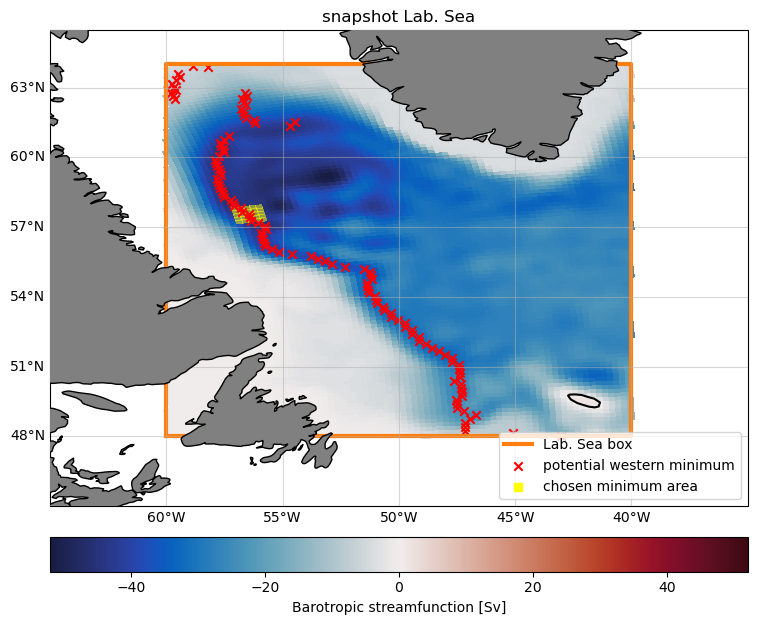

In [8]:
#in timestep loop
dst = ds.isel(time_counter = 403)

ind_xm = np.zeros(dst.shape[0]-1, dtype = 'int')
ind_ym = np.arange(dst.shape[0]-1)
strf_val = np.zeros(dst.shape[0]-1)

for i in range(dst.shape[0]-1):#iterate over latitudes in box
    #find large >5sv differences between gridpoints 
    diffs = np.ediff1d(dst.isel(y = i).where(dst.isel(y = i)< -0.5e7).values)
    
    if np.size(np.where(diffs > 0)[0]) > 0: 
        ind_xm[i] = np.where(diffs > 0)[0][0] #index of westernmost large difference       
    else: #in case of no large differences just take max. value
        ind_xm[i] = np.nanargmin(np.ediff1d(dst.isel(y = i))) 
            
    strf_val[i] = dst.isel(x = ind_xm[i], y = ind_ym[i]).values 

strf_ind = np.argmin(strf_val)
strf_max_9 = dst.isel(x = slice(ind_xm[strf_ind]-2, ind_xm[strf_ind]+3),
                           y = slice(strf_ind-2, strf_ind+3))
#for plots
lat_max = dst.coords['nav_lat'].values[ind_ym,ind_xm]
lon_max = dst.coords['nav_lon'].values[ind_ym,ind_xm]

proj = ccrs.PlateCarree()
black_cmap = ListedColormap(['black'])
cb_kwargs = {'orientation' : 'horizontal', 'pad': 0.04, 'label' : 'Barotropic streamfunction [Sv]'}

streamf_list = [dst]
title_list = ['REF snapshot']
#calling GeoAxes

fig, ax = plt.subplots(1,1, figsize = (9,10),
                       subplot_kw ={ 'projection' : proj })
#plots#
#for i,ax in enumerate(fig.axes):
    
p = (streamf_list[0]/1e6).plot.pcolormesh(x = 'nav_lon',y = 'nav_lat', transform = proj, ax = ax,
                            cmap = cm.balance, cbar_kwargs = cb_kwargs)
streamf_list[0].plot.contour(x = 'nav_lon',y = 'nav_lat', ax = ax,  transform = proj, levels = [0], cmap = black_cmap)

strf_max_9.plot.pcolormesh(x = 'nav_lon',y = 'nav_lat', transform = proj,  ax = ax,
                            cmap = ListedColormap(['yellow']), add_colorbar = False,  alpha = .5)
ax.plot(lab_x_list,lab_y_list, lw = 3, color = 'tab:orange',label = 'Lab. Sea box')

#plot_max points
ax.scatter(lon_max,lat_max, marker = 'x', color = 'red', label = 'potential western minimum')
ax.scatter(0,0,marker = 's', c ='yellow',label = 'chosen minimum area')
gl = ax.gridlines(draw_labels = True, alpha = 0.5)
gl.top_labels = False
gl.right_labels = False
    
ax.add_feature(cfeature.LAND,facecolor='gray', edgecolor = '00', zorder = 6)
ax.set_extent((-65,-35,45,65))
ax.legend(loc = 'lower right')
ax.set_title('snapshot Lab. Sea')
#plt.savefig('pics/snap_labsea', dpi = 300, bbox_inches = 'tight')

In [9]:
# write as funtcion

def calc_lab_ts(ds, ret_coords = False):
    ts = np.zeros(ds.shape[0])
    min_loc_x = np.zeros(ds.shape[0], dtype = 'int')
    min_loc_y = np.zeros(ds.shape[0], dtype = 'int')
    #in timestep loop
    for t in range(ds.shape[0]):#iterate over time
        dst = ds.isel(time_counter = t)

        ind_xm = np.zeros(dst.shape[0]-1, dtype = 'int')
        ind_ym = np.arange(dst.shape[0]-1)
        strf_val = np.zeros(dst.shape[0]-1)

        for i in range(dst.shape[0]-1):#iterate over latitudes in box
            #find large >5sv differences between gridpoints 
            diffs = np.ediff1d(dst.isel(y = i).where(dst.isel(y = i)< -0.5e7).values)

            if np.size(np.where(diffs > 0)[0]) > 0: 
                ind_xm[i] = np.where(diffs > 0)[0][0] #index of westernmost large difference       
            else: #in case of no large differences just take max. value
                ind_xm[i] = np.nanargmin(np.ediff1d(dst.isel(y = i))) 

            strf_val[i] = dst.isel(x = ind_xm[i], y = ind_ym[i]).values #streamfunc value at each potential minima

        strf_ind = np.argmin(strf_val) #index of  final minimum along western boundary is also y index 

        min_loc_x[t] = ind_xm[strf_ind]
        min_loc_y[t] = strf_ind
        ts[t] = dst.isel(x = slice(min_loc_x[t]-2, min_loc_x[t]+3), #take mean from around the minima (3x3 or 5x5)?
                                   y = slice(min_loc_y[t]-2, min_loc_y[t]+3)).mean().values
    if ret_coords:
        return ts/1e6, min_loc_x,min_loc_y
    else:
        return ts/1e6


In [12]:
%%time
ts_ref,min_loc_x,min_loc_y = calc_lab_ts(ds,ret_coords = True)

#caöc heatmap of chosen minima
lab_x = (-60, -40)#_boxmin, x_boxmax = -80, -65 #lon limits
lab_y = (48, 64)#y_boxmin, y_boxmax = 30, 51

lon_bins = np.linspace(lab_x[0], lab_x[1], 70)
lat_bins = np.linspace(lab_y[0], lab_y[1], 70)

lat_max = dst.coords['nav_lat'].values[min_loc_y,min_loc_x]
lon_max = dst.coords['nav_lon'].values[min_loc_y,min_loc_x]

heatm, xedges, yedges = np.histogram2d(lon_max, lat_max, bins=(lon_bins, lat_bins))
heatm = np.where(heatm > 0,heatm, np.nan)



CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


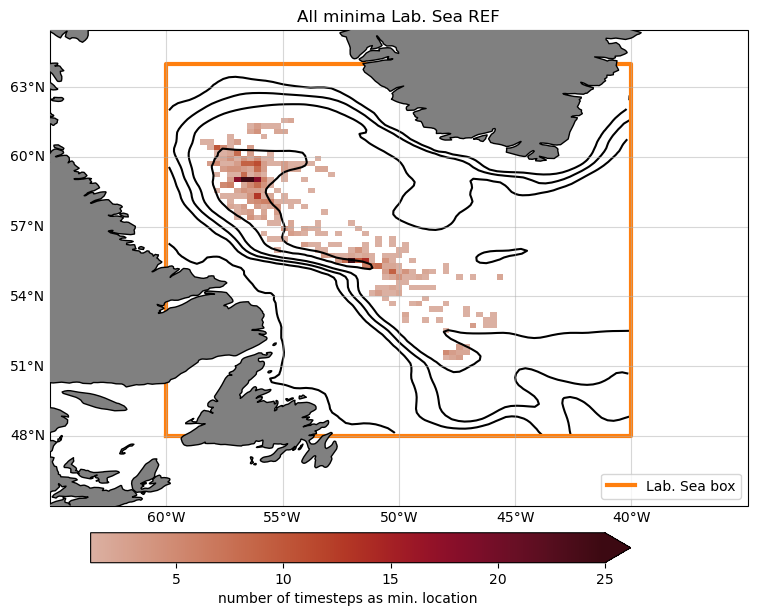

In [11]:
new_cmap = cmt.crop_by_percent(cm.amp, 20, which='min', N=None)
ds_mean = ds.mean(dim = 'time_counter')

fig, ax = plt.subplots(1,1, figsize = (9,10),
                       subplot_kw ={ 'projection' : proj })
    
#ds_mean.plot.pcolormesh(x = 'nav_lon',y = 'nav_lat', transform = proj, ax = ax,
#                            cmap = cm.balance, cbar_kwargs = cb_kwargs)
ds_mean.plot.contour(x = 'nav_lon',y = 'nav_lat', ax = ax,  transform = proj, levels = 11, cmap = black_cmap)

ax.plot(lab_x_list,lab_y_list, lw = 3, color = 'tab:orange',label = 'Lab. Sea box')
p = ax.pcolormesh(lon_bins,lat_bins,heatm.T, cmap = new_cmap ,transform = proj, vmax = 25)

gl = ax.gridlines(draw_labels = True, alpha = 0.5)
gl.top_labels = False
gl.right_labels = False
    
ax.add_feature(cfeature.LAND,facecolor='gray', edgecolor = '00', zorder = 6)
ax.set_extent((-65,-35,45,65))
ax.legend(loc = 'lower right')
ax.set_title('All minima Lab. Sea REF')

cbar_ax = fig.add_axes([0.17, 0.2, 0.6, 0.03]) 
cb = fig.colorbar(p, cax = cbar_ax, orientation ='horizontal', extend = 'max')
cbar_ax.set_xlabel('number of timesteps as min. location')  # cax == cb.ax
plt.savefig('pics/heatmap_minima', dpi = 300, bbox_inches = 'tight')

In [16]:
%%time
#load WIND
ds = load_n_slice_x(file_list[1])
ds = slice_y(ds)
ts_wind = calc_lab_ts(ds)

CPU times: user 2min 40s, sys: 8.12 s, total: 2min 48s
Wall time: 3min


In [17]:
%%time
#load term
ds = load_n_slice_x(file_list[2])
ds = slice_y(ds)
ts_buoy = calc_lab_ts(ds)

CPU times: user 2min 40s, sys: 8.3 s, total: 2min 48s
Wall time: 3min 11s


In [18]:
%%time
#load clim
ds = load_n_slice_x(file_list[3])
ds = slice_y(ds)
ts_clim = calc_lab_ts(ds)

CPU times: user 2min 38s, sys: 8.01 s, total: 2min 46s
Wall time: 3min 7s


Text(0.5, 1.0, 'Labrador Sea - unfiltered')

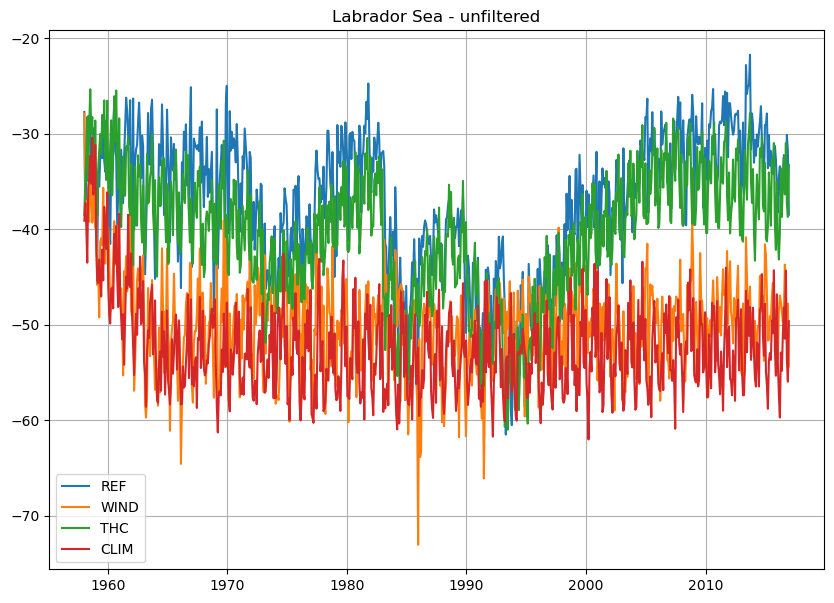

In [21]:
time_vec = ds.time_counter
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(1,1,1)


ax.plot(time_vec,ts_ref, label = 'REF')
ax.plot(time_vec,ts_wind, label = 'WIND')
ax.plot(time_vec,ts_buoy, label = 'THC')
ax.plot(time_vec,ts_clim, label = 'CLIM')
ax.legend()
ax.grid()
ax.set_title('Labrador Sea - unfiltered')

In [23]:
def smooth_arr(arr,window_size = 23):
    
    window = np.hanning(window_size)

    padded_arr = np.pad(arr, (window_size // 2, window_size // 2), mode='edge')

    smooth_arr = np.convolve(padded_arr, window, mode='valid')
    #scale to unfiltered data
    scaling_factor = np.nanmean(arr) / np.nanmean(smooth_arr)
    
    return smooth_arr* scaling_factor

tss_ref = smooth_arr(ts_ref)
tss_wind = smooth_arr(ts_wind)
tss_buoy = smooth_arr(ts_buoy)
tss_clim = smooth_arr(ts_clim)


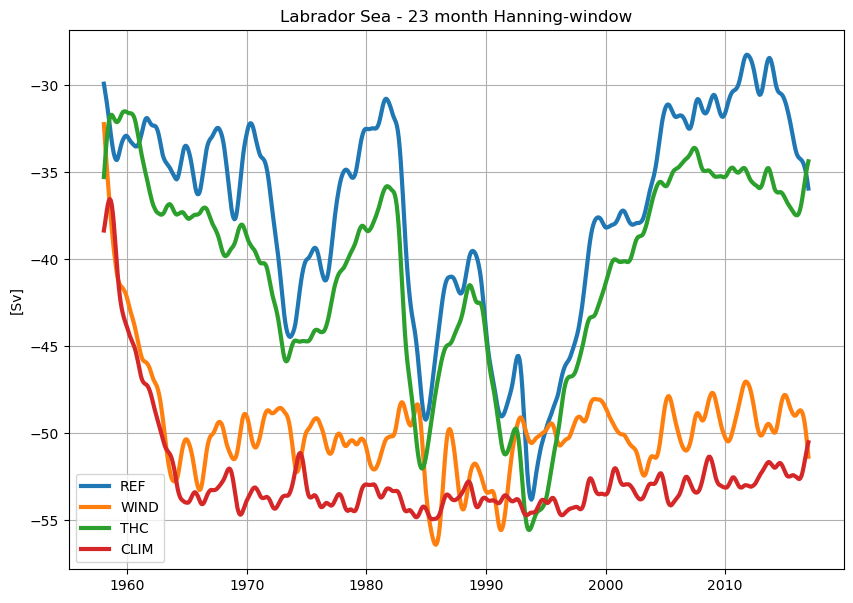

In [27]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(1,1,1)


ax.plot(time_vec,tss_ref,lw = 3, label = 'REF')
ax.plot(time_vec,tss_wind,lw = 3, label = 'WIND')
ax.plot(time_vec,tss_buoy,lw = 3, label = 'THC')
ax.plot(time_vec,tss_clim,lw = 3, label = 'CLIM')
ax.legend()
ax.grid()
ax.set_title('Labrador Sea - 23 month Hanning-window')
ax.set_ylabel('[Sv]')
plt.savefig('pics/ts_lab_23hann', dpi = 300, bbox_inches = 'tight')

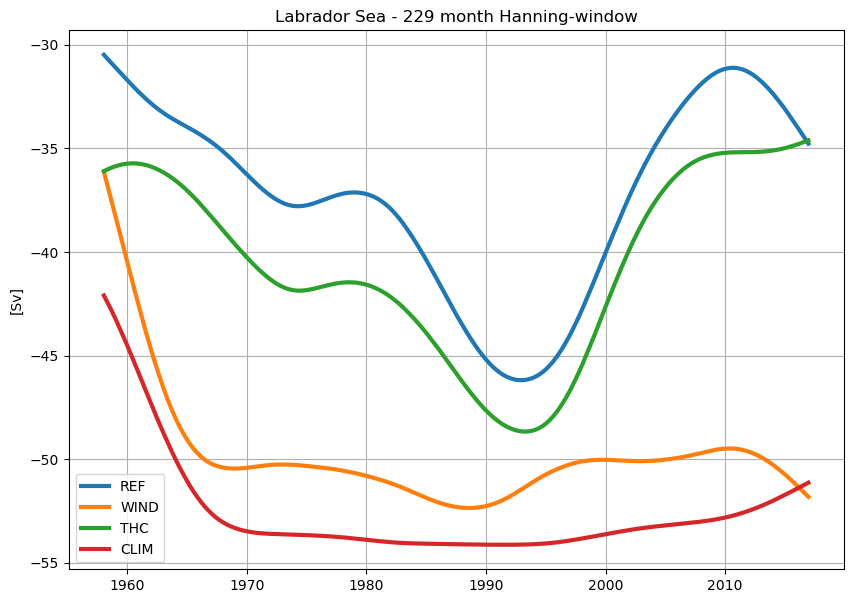

In [28]:
tsss_ref = smooth_arr(ts_ref, window_size = 229)
tsss_wind = smooth_arr(ts_wind, window_size = 229)
tsss_buoy = smooth_arr(ts_buoy, window_size = 229)
tsss_clim = smooth_arr(ts_clim, window_size = 229)

fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(1,1,1)


ax.plot(time_vec,tsss_ref,lw = 3, label = 'REF')
ax.plot(time_vec,tsss_wind,lw = 3, label = 'WIND')
ax.plot(time_vec,tsss_buoy,lw = 3, label = 'THC')
ax.plot(time_vec,tsss_clim,lw = 3, label = 'CLIM')
ax.legend()
ax.grid()
ax.set_title('Labrador Sea - 229 month Hanning-window')
ax.set_ylabel('[Sv]')
plt.savefig('pics/ts_lab_229hann', dpi = 300, bbox_inches = 'tight')